In [520]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [529]:
feature = np.array([],dtype=int)
for i in range(2):
    for j in range(2):
        for m in range(2):
            for n in range(2):
                feature = np.append(feature,[i,j,m,n])

feature = np.reshape(feature,(16,4))

target = np.array([[s%2 for s in feature.sum(axis=1)]]).T

In [530]:
print(feature)
print()
print(target)

[[0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 1 1 1]]

[[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]


In [531]:
class Dense:
    def __init__(self, n_output_nodes):
        self.n_output = n_output_nodes
    
    def build(self, n_input):
        self.weight = np.random.uniform(low=-1, high=1, size=(n_input + 1, self.n_output))
        self.output = np.zeros((1, self.n_output))
    
    def call(self, x):
        self.input = np.append(x,1)
        v = np.matmul(self.input, self.weight)
        self.output = 1 / (1 + np.exp(-v))
        
        return self.output

In [532]:
np.random.seed(2020)
layer = Dense(4)
layer.build(4)
layer.call(feature[1])

array([0.4767296 , 0.45863976, 0.25550647, 0.49327017])

In [611]:
class Multilayers:
    def __init__(self, x_shape, layers):
        self.model = layers
        self.n_layers = len(layers)
        
        n_input = x_shape
        for layer in self.model:
            layer.build(n_input)
            n_input = layer.n_output
            
    def predict(self, x):
        #self.outputs = dict()
        
        input_signal = x
        for i, layer in zip(range(self.n_layers), self.model):
            output_signal = layer.call(input_signal)
            #self.outputs[i] = output_signal
            input_signal = output_signal

        self.y = output_signal
        return self.y
    
    def __derivative(output):
        return output * (1 - output)
    
    def back_prop(self, target):
        learn_rate = 0.1
        
        i = 0
        for layer in reversed(self.model):
            #prime = self.__derivative(layer.output)
            prime = layer.output * (1 - layer.output)
            
            if i == 0:
                deltas = (target - self.y) * prime
            else:
                deltas = prime * np.inner(deltas, prev_weight[:-1])
            i+=1
            prev_weight = np.copy(layer.weight)
          
            layer.weight += learn_rate * np.outer(layer.input, deltas)
         

In [608]:
np.random.seed(2020)

model = Multilayers(4,[
    Dense(4),
    Dense(1)
])

model.predict(feature[0])


array([0.59519486])

In [609]:
def train(model, feature, target):
    epoch_size = len(feature)
    order = np.random.choice(range(epoch_size),size=epoch_size, replace=False)
    error = np.array([])
    for i in order:
        output = model.predict(feature[i])
        model.back_prop(target[i])
        error = np.append(error, target[i] - output)
    return np.absolute(error).mean() #np.absolute(error).max()

0 0.5003570379936395
2000 0.5021212213492161
4000 0.5019998652101454
6000 0.5018884382996655
8000 0.5017977276031786
--- 11.101446866989136 seconds ---
10000 0.5017049115423553


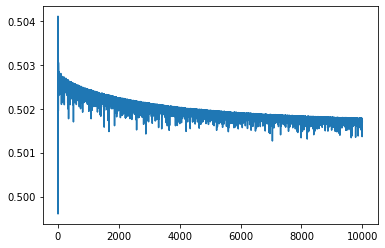

In [625]:
model = Multilayers(4,[
    Dense(4),
    Dense(1)
])

error = 1
history = []

start_time = time.time()
i=0
while error > 0.05 and i < 10000:
    error = train(model, feature, target)
    history = np.append(history,error)

    if i % 2000 == 0:
        print(i, error)
        
    i += 1

print("--- %s seconds ---" % (time.time() - start_time))
print(i, error)

plt.plot(history)

In [626]:
np.absolute(np.array([int(model.predict(x)>0.5) for x in feature]) -  target.ravel()).mean()

0.5625

In [627]:
np.array([int(model.predict(x)>0.5) for x in feature]) -  target.ravel()

array([ 0, -1, -1,  0, -1,  0,  1,  0, -1,  0,  1,  0,  1, -1,  0,  1])